In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
from experiment_analysis import analyze_multiple_metrics, analyze_pairwise_metrics

In [3]:
fixed_params = {
    'num_users': 10000,
    'countries': ['US', 'UK', 'DE', 'FR', 'CA', 'AU', 'JP', 'IN'],
    'platforms': ['iOS', 'Android', 'Web', 'Desktop'],
    'user_segments': ['Segment_1', 'Segment_2', 'Segment_3', 'Segment_4'],
    'ab_groups': ['a1', 'a2', 'b'],
    'noise_level': 1.0,
    'base_increase_percentage': 0.05,
    'correlation_level': 0.5,
}

values_ranges = {
    'num_users': range(100, 10000, 500),
    'noise_level': np.arange(0.1, 2.0, 0.1),
    'base_increase_percentage': np.arange(0.01, 0.1, 0.01),
    'correlation_level': np.arange(0.0, 1.1, 0.1)
}

INFO:experiment_analysis.experiment_analysis:Analyzing num_users...
100%|██████████| 20/20 [02:16<00:00,  6.84s/it]
INFO:experiment_analysis.experiment_analysis:no_enhancement:
INFO:experiment_analysis.experiment_analysis:  100: Median 0.48917248847619504
INFO:experiment_analysis.experiment_analysis:  600: Median 0.3901092156580899
INFO:experiment_analysis.experiment_analysis:  1100: Median 0.36689104491741975
INFO:experiment_analysis.experiment_analysis:  1600: Median 0.3643750329592994
INFO:experiment_analysis.experiment_analysis:  2100: Median 0.21417312383880605
INFO:experiment_analysis.experiment_analysis:  2600: Median 0.2906578304608429
INFO:experiment_analysis.experiment_analysis:  3100: Median 0.04375499308095442
INFO:experiment_analysis.experiment_analysis:  3600: Median 0.12550309795676068
INFO:experiment_analysis.experiment_analysis:  4100: Median 0.11878099642661177
INFO:experiment_analysis.experiment_analysis:  4600: Median 0.05458868905516405
INFO:experiment_analysis.exp

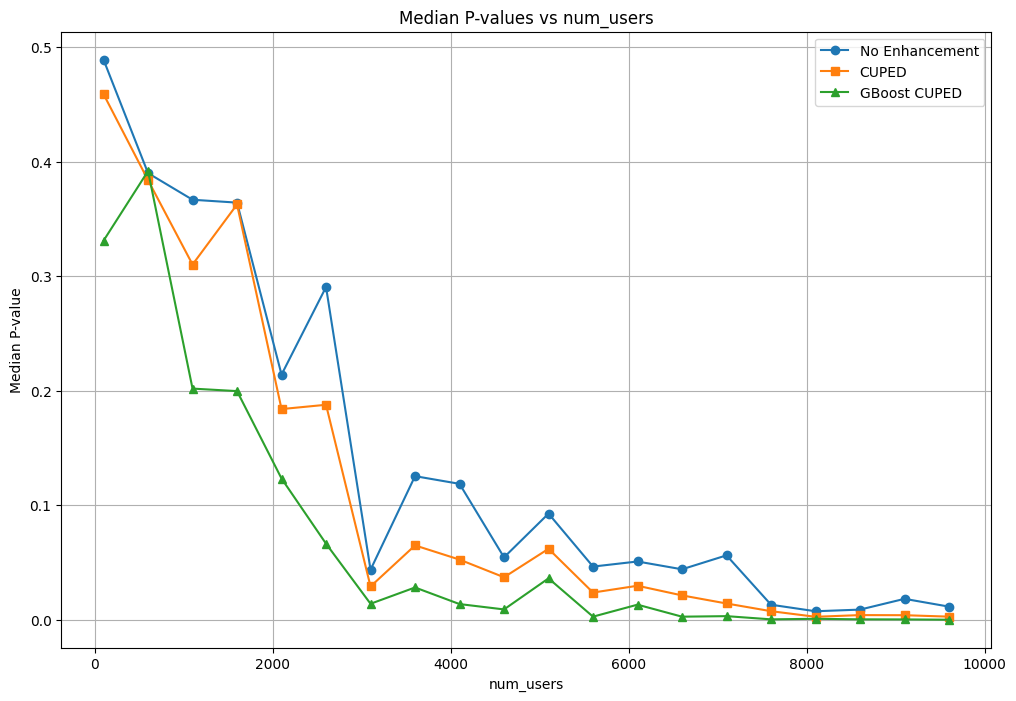

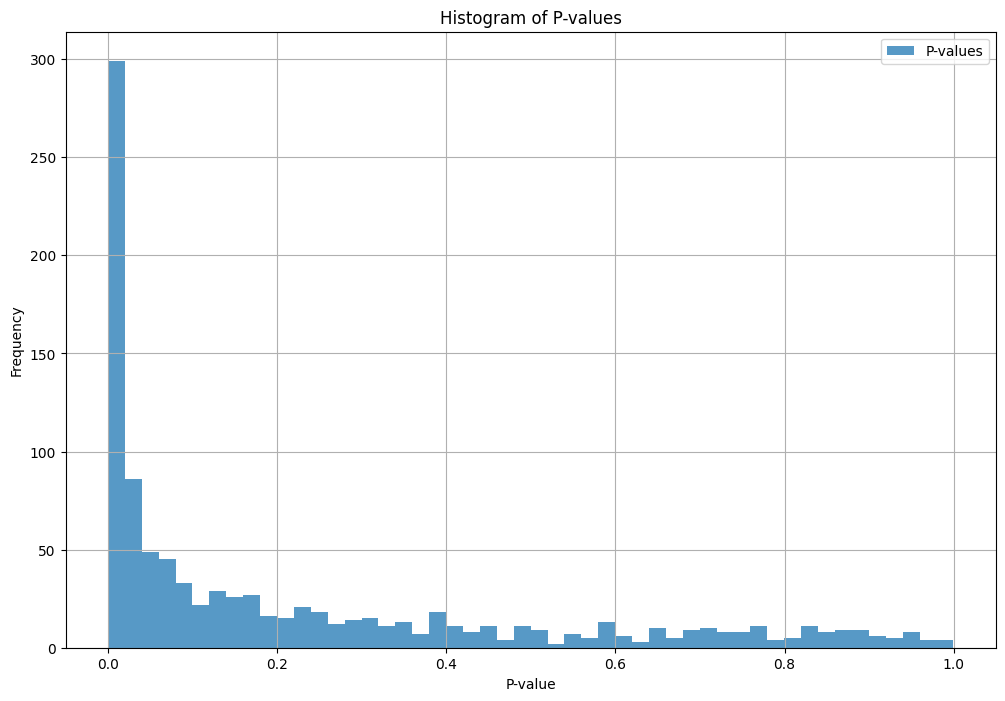

INFO:experiment_analysis.experiment_analysis:Analyzing noise_level...
100%|██████████| 19/19 [03:30<00:00, 11.09s/it]
INFO:experiment_analysis.experiment_analysis:no_enhancement:
INFO:experiment_analysis.experiment_analysis:  0.1: Median 0.01505915888451326
INFO:experiment_analysis.experiment_analysis:  0.2: Median 0.015124438556068666
INFO:experiment_analysis.experiment_analysis:  0.30000000000000004: Median 0.015189431588256882
INFO:experiment_analysis.experiment_analysis:  0.4: Median 0.015224986490477158
INFO:experiment_analysis.experiment_analysis:  0.5: Median 0.015260775917586962
INFO:experiment_analysis.experiment_analysis:  0.6: Median 0.015296800863422087
INFO:experiment_analysis.experiment_analysis:  0.7000000000000001: Median 0.01533306232622033
INFO:experiment_analysis.experiment_analysis:  0.8: Median 0.01536956130862498
INFO:experiment_analysis.experiment_analysis:  0.9: Median 0.01540629881768881
INFO:experiment_analysis.experiment_analysis:  1.0: Median 0.0154432758648

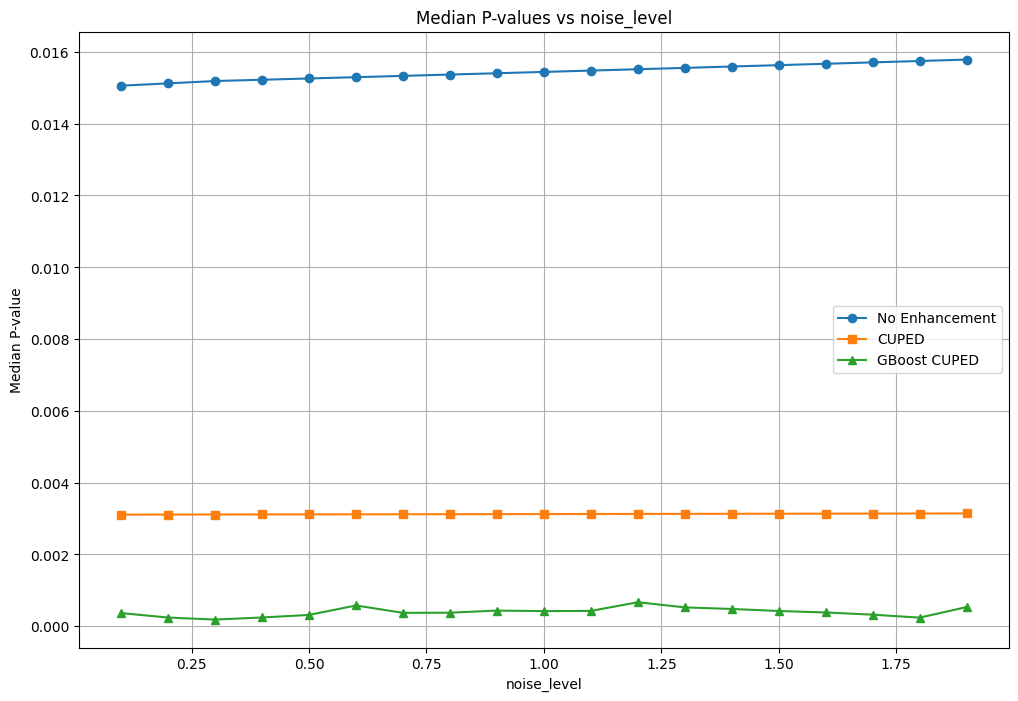

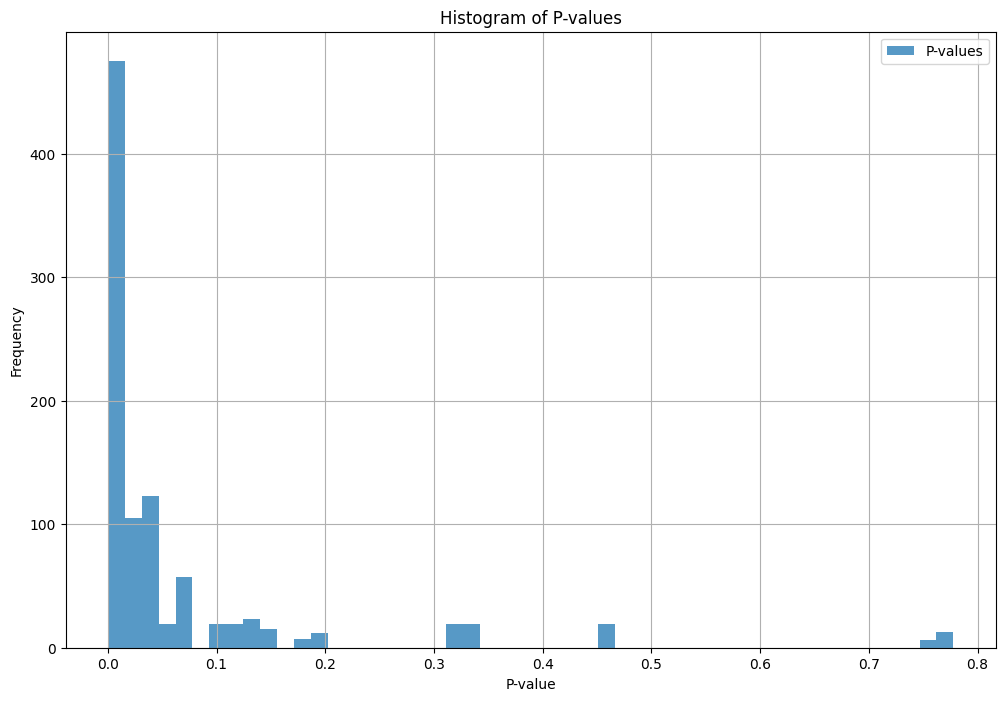

INFO:experiment_analysis.experiment_analysis:Analyzing base_increase_percentage...
100%|██████████| 9/9 [01:43<00:00, 11.46s/it]
INFO:experiment_analysis.experiment_analysis:no_enhancement:
INFO:experiment_analysis.experiment_analysis:  0.01: Median 0.5715533581895406
INFO:experiment_analysis.experiment_analysis:  0.02: Median 0.3348103988835544
INFO:experiment_analysis.experiment_analysis:  0.03: Median 0.1547714547497929
INFO:experiment_analysis.experiment_analysis:  0.04: Median 0.054069598758780806
INFO:experiment_analysis.experiment_analysis:  0.05: Median 0.015443275864880665
INFO:experiment_analysis.experiment_analysis:  0.060000000000000005: Median 0.003565745841408244
INFO:experiment_analysis.experiment_analysis:  0.06999999999999999: Median 0.000693325911754262
INFO:experiment_analysis.experiment_analysis:  0.08: Median 0.00011034437749949356
INFO:experiment_analysis.experiment_analysis:  0.09: Median 1.3785357790442233e-05
INFO:experiment_analysis.experiment_analysis:cuped:


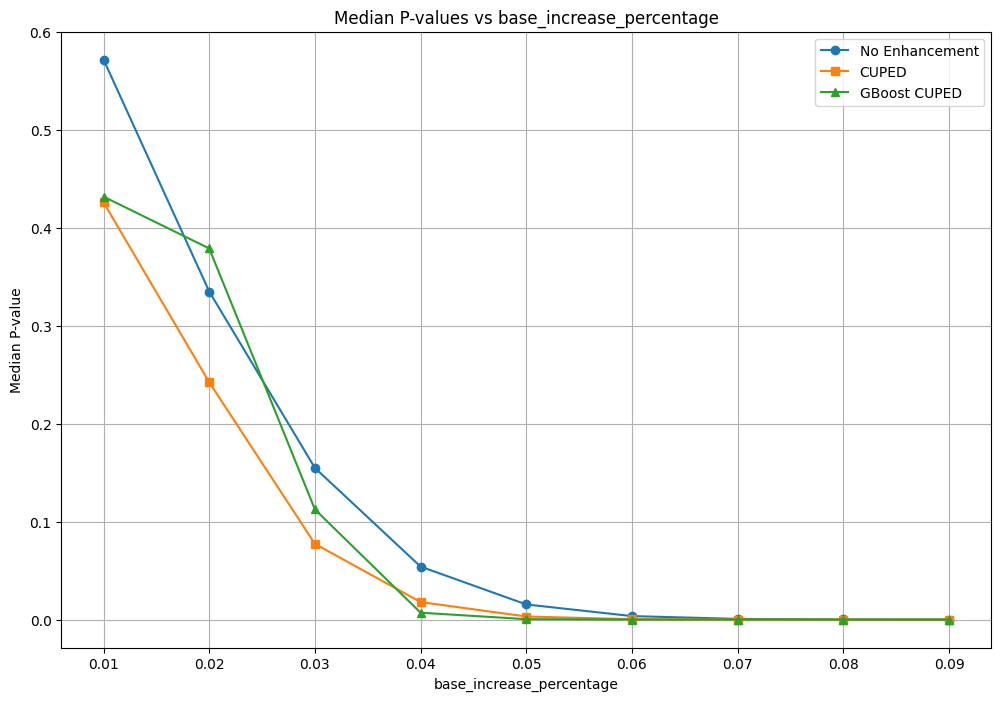

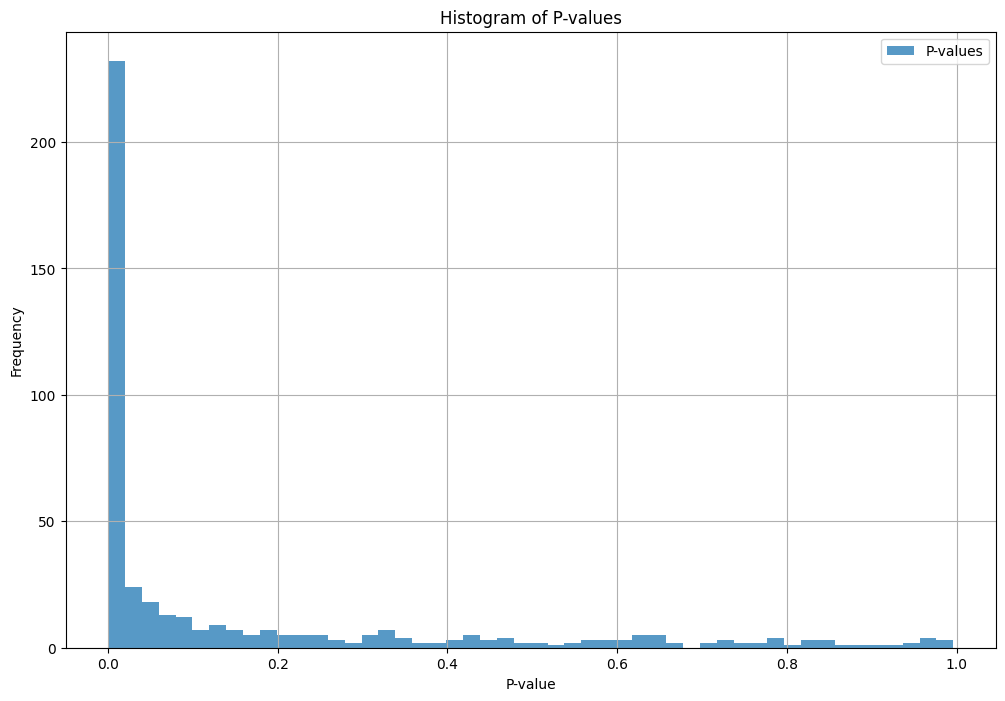

INFO:experiment_analysis.experiment_analysis:Analyzing correlation_level...
100%|██████████| 11/11 [02:05<00:00, 11.37s/it]
INFO:experiment_analysis.experiment_analysis:no_enhancement:
INFO:experiment_analysis.experiment_analysis:  0.0: Median 0.01468570101077934
INFO:experiment_analysis.experiment_analysis:  0.1: Median 0.015427092504911219
INFO:experiment_analysis.experiment_analysis:  0.2: Median 0.015432575366822313
INFO:experiment_analysis.experiment_analysis:  0.30000000000000004: Median 0.015437135598416269
INFO:experiment_analysis.experiment_analysis:  0.4: Median 0.015440733091952385
INFO:experiment_analysis.experiment_analysis:  0.5: Median 0.015443275864880665
INFO:experiment_analysis.experiment_analysis:  0.6000000000000001: Median 0.015444590722943685
INFO:experiment_analysis.experiment_analysis:  0.7000000000000001: Median 0.015444354112600003
INFO:experiment_analysis.experiment_analysis:  0.8: Median 0.015441899891054356
INFO:experiment_analysis.experiment_analysis:  0.9

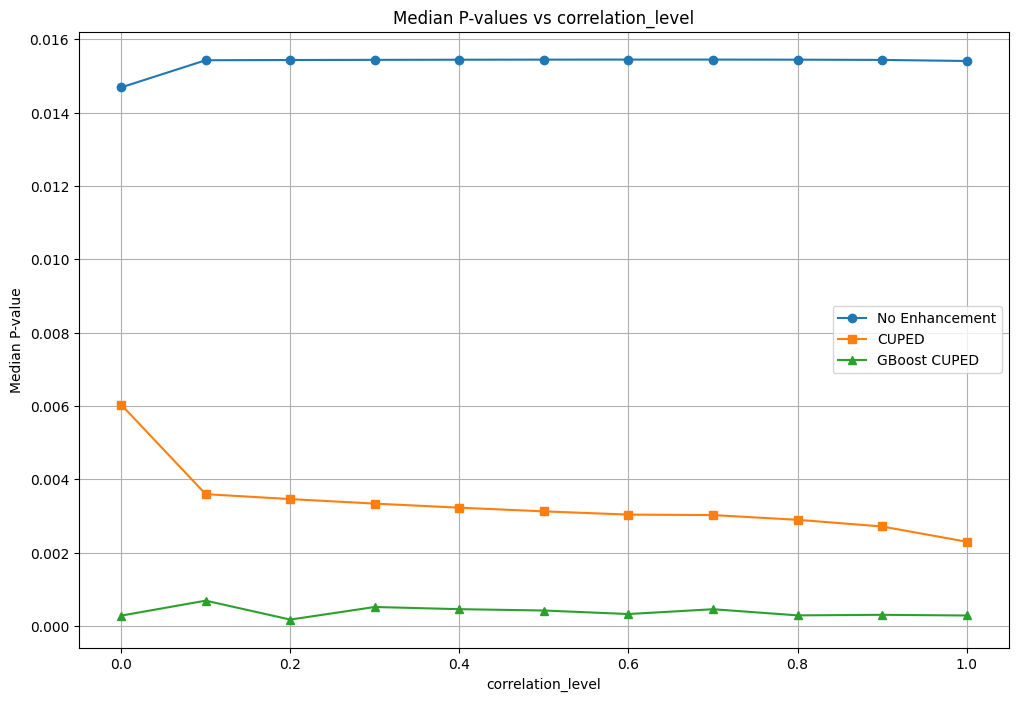

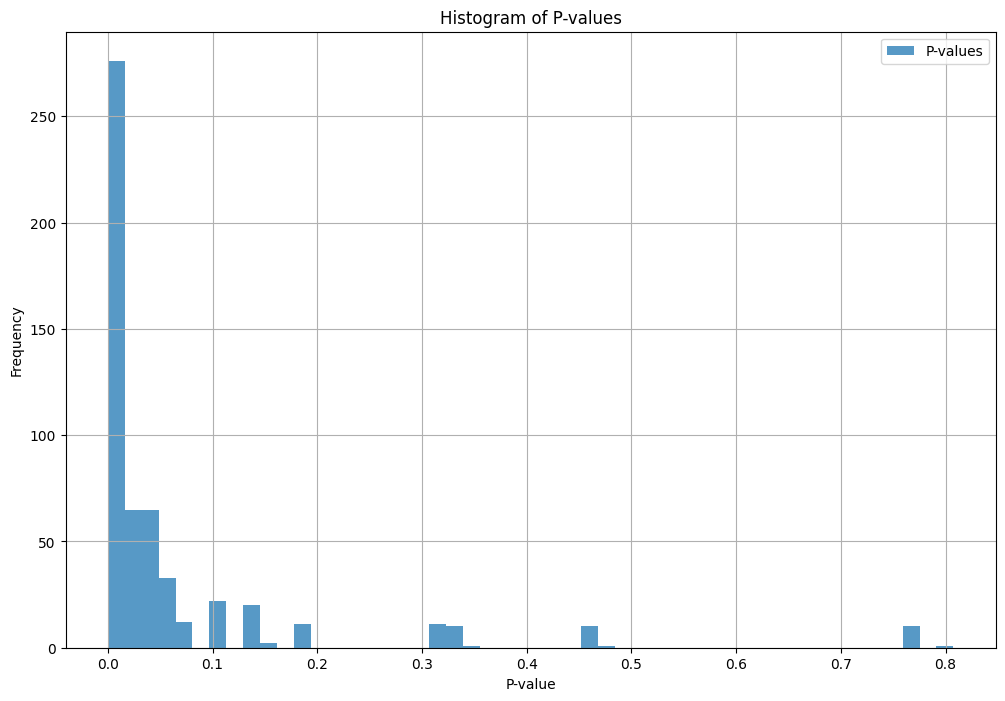

In [4]:
analyze_multiple_metrics(values_ranges, fixed_params)

In [5]:
variable_pairs = [
    ('num_users', 'noise_level'),
    ('num_users', 'base_increase_percentage'),
    ('num_users', 'correlation_level'),
#     ('noise_level', 'base_increase_percentage'),
#     ('noise_level', 'correlation_level'),
#     ('base_increase_percentage', 'correlation_level')
]

INFO:experiment_analysis.experiment_analysis:Analyzing pair (num_users, noise_level)...
100%|██████████| 20/20 [1:05:27<00:00, 196.37s/it]


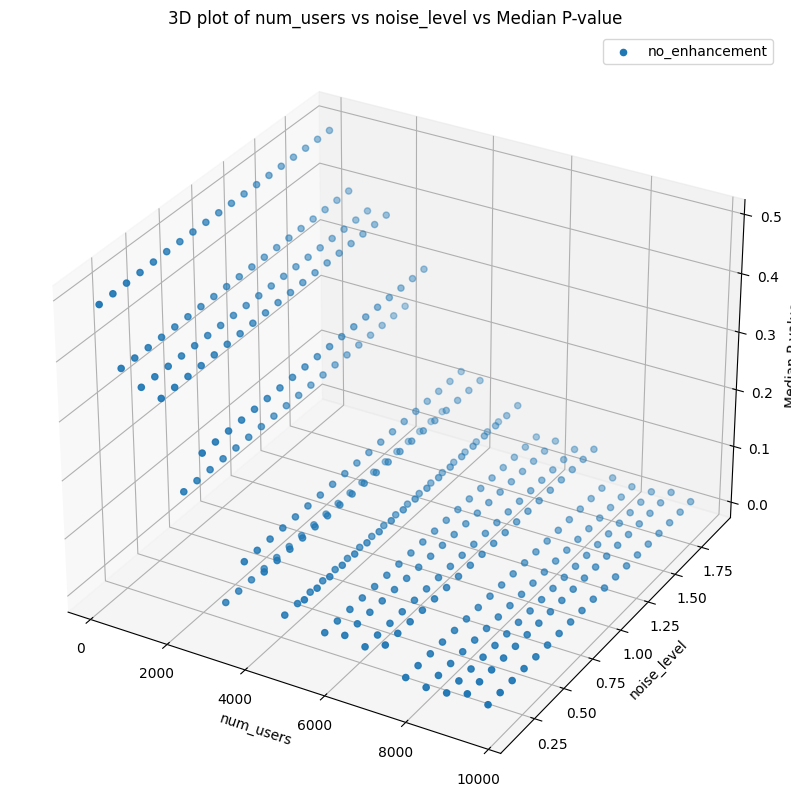

INFO:experiment_analysis.experiment_analysis:Analyzing pair (num_users, base_increase_percentage)...
100%|██████████| 20/20 [44:13<00:00, 132.67s/it]


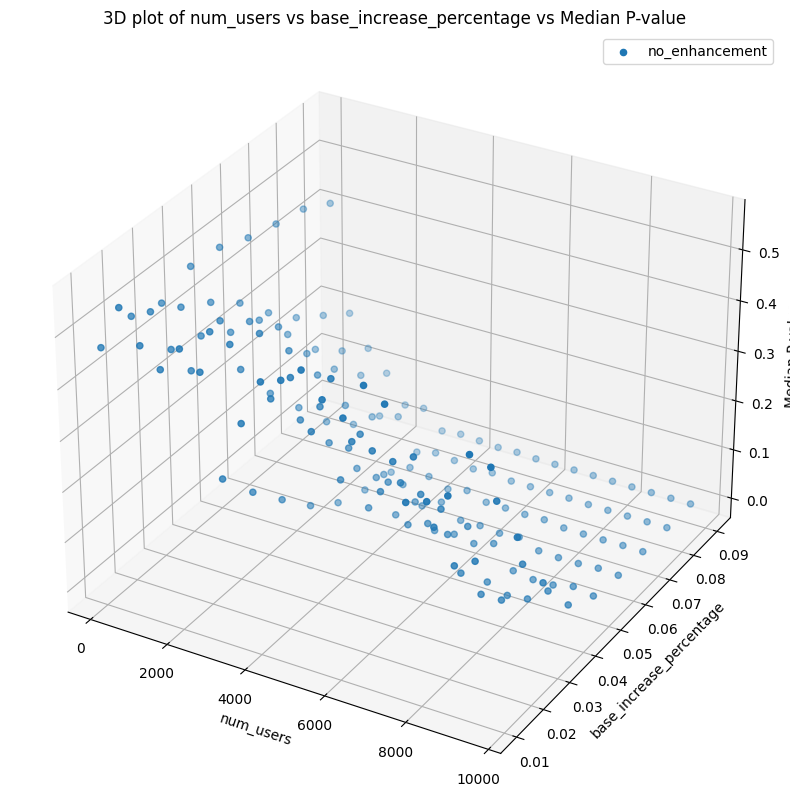

INFO:experiment_analysis.experiment_analysis:Analyzing pair (num_users, correlation_level)...
 10%|█         | 2/20 [04:32<40:50, 136.14s/it]


KeyboardInterrupt: 

In [6]:
analyze_pairwise_metrics(variable_pairs, values_ranges, fixed_params)